In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp
import numpy as np



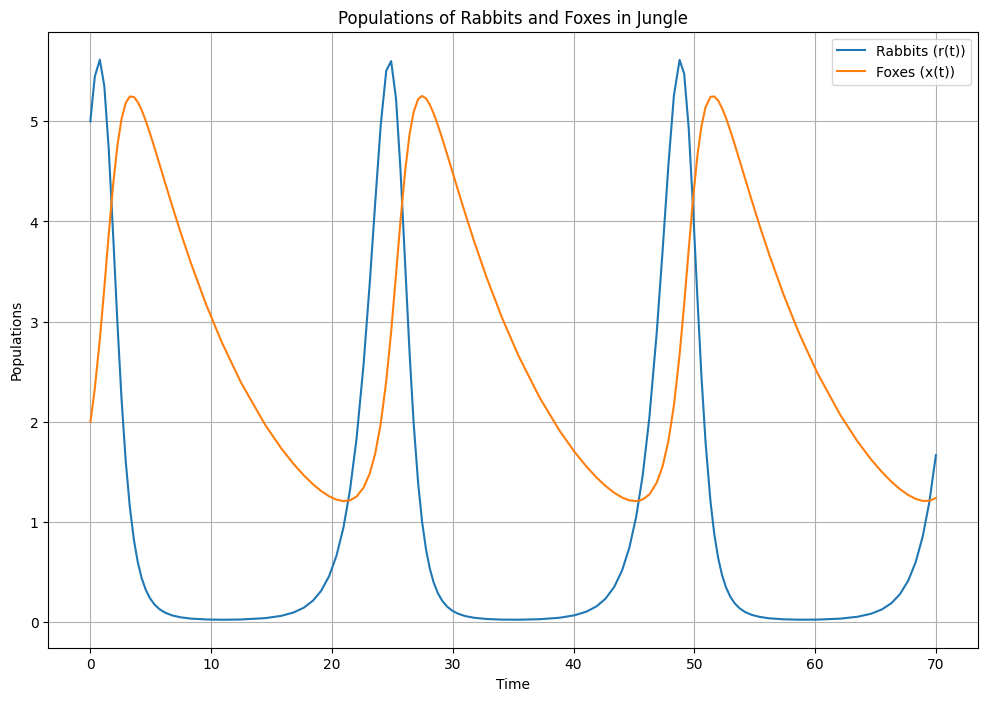

In [2]:
#Task 1: Given initial conditions $ r(0) = 5$ and $ x(0) = 2, $ solve for r(t) and x(t) and plot
#the solution for 0 ≤ t ≤ 70
def predator_model_f(t, y, alpha, beta, delta, gamma):
    r, x = y
    return np.array([alpha * r - beta * r * x,
                     delta * r * x - gamma * x])

# Set the parameter values
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.1
sol = solve_ivp(predator_model_f, [0, 70], [5, 2],
                rtol=1e-6, args=(alpha, beta, delta, gamma))

# plotting of the graph
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
plt.xlabel('Time')
plt.ylabel('Populations')
plt.title('Populations of Rabbits and Foxes in Jungle')
curves = ax.plot(sol.t, sol.y.T)
ax.legend(curves, ['Rabbits (r(t))', 'Foxes (x(t))'])
plt.grid()
plt.show()

For the initial conditions (r0, x0) = (5.99, 8.35):
For the initial conditions (r0, x0) = (4.01, 7.36):
For the initial conditions (r0, x0) = (3.91, 4.14):
For the initial conditions (r0, x0) = (3.30, 5.50):
For the initial conditions (r0, x0) = (5.09, 5.97):
For the initial conditions (r0, x0) = (4.43, 7.26):
For the initial conditions (r0, x0) = (3.20, 5.19):
For the initial conditions (r0, x0) = (5.92, 6.27):
For the initial conditions (r0, x0) = (7.33, 2.90):
For the initial conditions (r0, x0) = (3.79, 7.66):


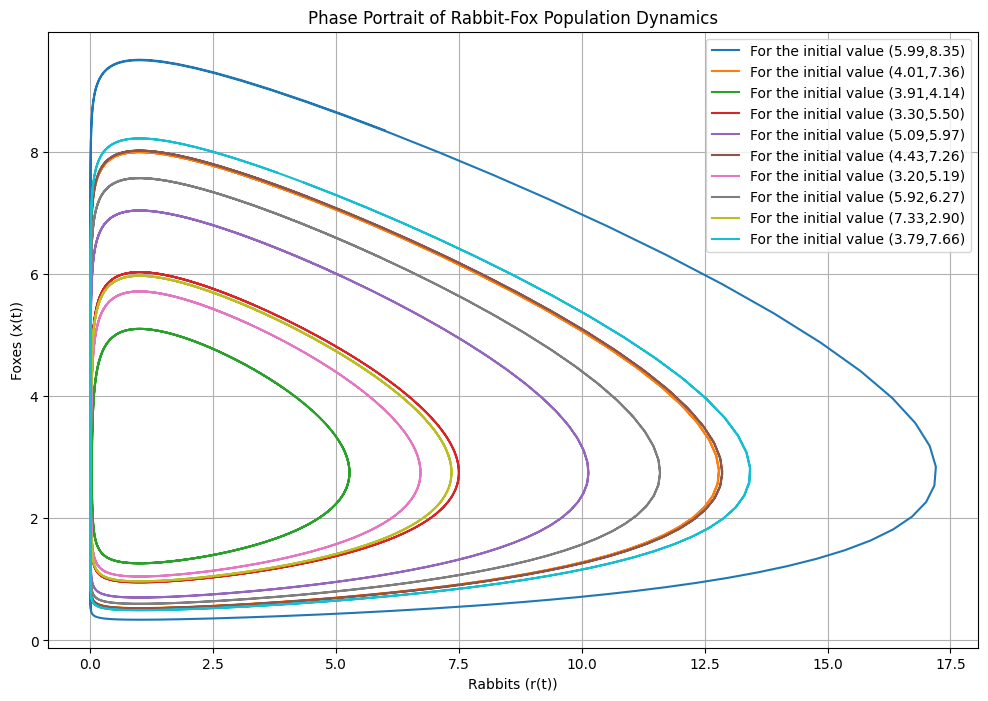

In [3]:
#Task 2: The phase plot of the solution consists of points (x(t), r(t)) for various t values.
#Prepare a fgure (phase portrait) with phase plots of, say, 10 solutions, one each for randomly
#chosen initial values r(0) and x(0) between 1 and 9.
def predator_model_f(t, y, alpha, beta, delta, gamma):
    r, x = y
    return np.array([alpha * r - beta * r * x,
                     delta * r * x - gamma * x])

# Set the parameter values
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.1

# Generate 10 random initial conditions
initial_conditions = np.random.uniform(1, 9, size=(10, 2))

# Create a figure for the phase portrait
plt.figure(figsize=(12, 8))
plt.xlabel('Rabbits (r(t))')
plt.ylabel('Foxes (x(t))')
plt.title('Phase Portrait of Rabbit-Fox Population Dynamics')
plt.grid()

# Plot the phase plots for the 10 initial conditions
for i, (r0, x0) in enumerate(initial_conditions):
    print(f'For the initial conditions (r0, x0) = ({r0:.2f}, {x0:.2f}):')
    #:.2f is a formatting specifier that tells Python to format the variables as floating-point numbers with two decimal places.
    sol = solve_ivp(predator_model_f, [0, 70], [r0, x0], t_eval=np.linspace(0, 70, 1000),
                    rtol=1e-6, args=(alpha, beta, delta, gamma))

    plt.plot(sol.y[0], sol.y[1],label=f'For the initial value ({r0:.2f},{x0:.2f})' )
#sol.y[0] contains the values of r over time, and sol.y[1] contains the values of x over time,
#so we're plotting the rabbit and fox populations against each other.

# Add a legend to differentiate the solutions
plt.legend()
plt.show()


Equilibrium Points:
r = 0.0, x = 0.0
r = 1.00000000000000, x = 2.75000000000000


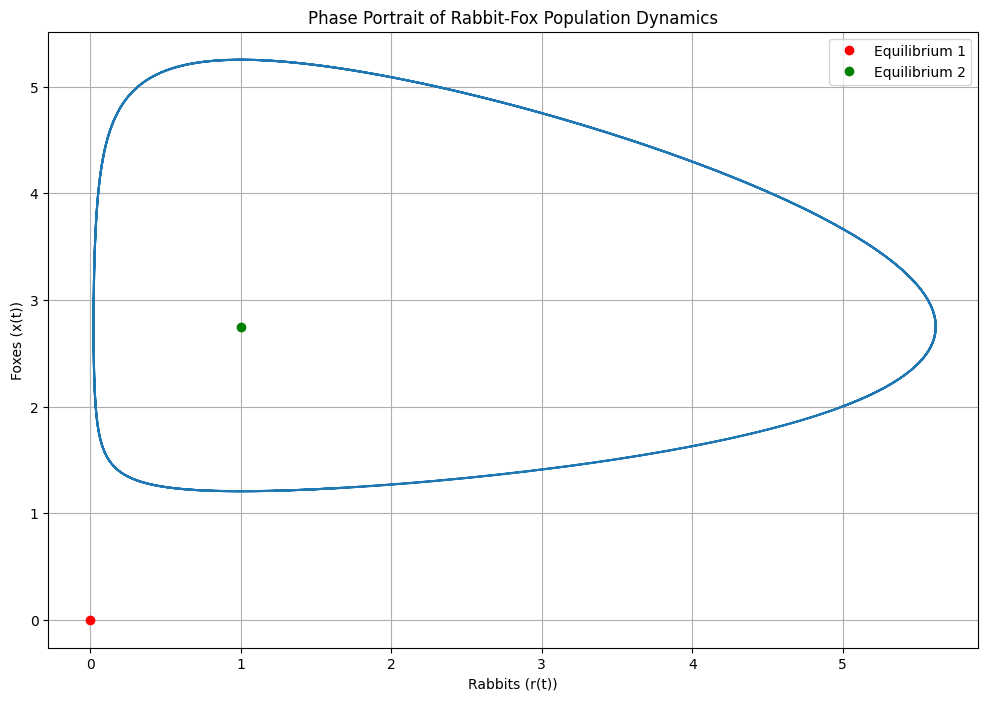

In [4]:
# Task 3: This system has two equilibria. Solve for them and mark them in your phase portrait
import sympy as sp
def predator_model_f (t, y, alpha, beta, delta, gamma):
    r, x = y
    return np.array([alpha * r - beta * r * x,
                     delta * r * x - gamma * x])
#creates two symbolic variables, r and x, using the sp.symbols()
r, x = sp.symbols('r x')

# Parameters
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.1

# set ode system
drdt = alpha * r - beta * r * x
dxdt = delta * r * x - gamma * x

# Set derivatives equal to zero to find equilibrium points
equilibrium_eq1 = sp.Eq(drdt, 0)
equilibrium_eq2 = sp.Eq(dxdt, 0)

# Solve for equilibrium points
equilibrium_points = sp.solve((equilibrium_eq1, equilibrium_eq2), (r, x))
equilibrium1=equilibrium_points[0]
equilibrium2=equilibrium_points[1]
print("Equilibrium Points:")
for point in equilibrium_points:
      print(f"r = {point[0]}, x = {point[1]}")

sol = solve_ivp(predator_model_f, [0, 100], [5, 2], t_eval=np.linspace(0, 70, 1000),
                    rtol=1e-6, args=(alpha, beta, delta, gamma))
# Create a figure for the phase portrait
plt.figure(figsize=(12, 8))
plt.xlabel('Rabbits (r(t))')
plt.ylabel('Foxes (x(t))')
plt.plot(sol.y[0], sol.y[1])
plt.title('Phase Portrait of Rabbit-Fox Population Dynamics')
# Mark equilibrium points
plt.plot(*equilibrium1, 'ro', label='Equilibrium 1')
plt.plot(*equilibrium2, 'go', label='Equilibrium 2')
plt.legend()
plt.grid()
plt.show()




